In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"]=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [2]:
df = pd.read_csv("customer_data.csv")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df = df.drop(columns=['StockCode','Country','Description'],axis=1)

In [5]:
df = df.drop(df[df['CustomerID'].isnull()].index,axis=0)

In [6]:
df = df.drop_duplicates()

In [7]:
# r f的计算需要使用去除退单的数据 m不使用退单的数据
df_m = df

In [8]:
group = df.groupby('CustomerID')
result = group.apply(lambda x: x).head(100)
print(result)
print(type(group))

    InvoiceNo  Quantity     InvoiceDate  UnitPrice  CustomerID
0      536365         6  12/1/2010 8:26       2.55     17850.0
1      536365         6  12/1/2010 8:26       3.39     17850.0
2      536365         8  12/1/2010 8:26       2.75     17850.0
5      536365         2  12/1/2010 8:26       7.65     17850.0
6      536365         6  12/1/2010 8:26       4.25     17850.0
..        ...       ...             ...        ...         ...
138    536381         3  12/1/2010 9:41       3.95     15311.0
139    536381        36  12/1/2010 9:41       1.06     15311.0
140    536381        10  12/1/2010 9:41       6.75     15311.0
141   C536379        -1  12/1/2010 9:41      27.50     14527.0
142    536382        12  12/1/2010 9:45       0.85     16098.0

[100 rows x 5 columns]
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

def calculate_recency(group):
    td = pd.Timestamp('2012-01-01 00:00:00')
    tts = td.timestamp()
    md = group['InvoiceDate'].max()
    mts = md.timestamp()
    return tts - mts
recency = group.apply(calculate_recency).rename('Recency').reset_index()

In [10]:
recency

,CustomerID,Recency
0,12346.0,30030180.0
1,12347.0,2102880.0
2,12348.0,8419620.0
3,12349.0,3506940.0
4,12350.0,28713540.0
...,...,...
4367,18280.0,25884480.0
4368,18281.0,17500020.0
4369,18282.0,2549820.0
4370,18283.0,2203080.0


In [11]:
frequency = group['InvoiceNo'].agg(['nunique', 'count']).rename(
    columns={'nunique': 'InvoiceNo_Category_Count', 'count': 'InvoiceNo_Total_Count'})
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo_Category_Count,InvoiceNo_Total_Count
0,12346.0,2,2
1,12347.0,7,116
2,12348.0,4,20
3,12349.0,1,45
4,12350.0,1,9
...,...,...,...
4367,18280.0,1,8
4368,18281.0,1,4
4369,18282.0,3,12
4370,18283.0,16,238


In [12]:
group = df_m.groupby('CustomerID')
result = group.apply(lambda x: x).head(100)
print(result)
print(type(group))

    InvoiceNo  Quantity         InvoiceDate  UnitPrice  CustomerID
0      536365         6 2010-12-01 08:26:00       2.55     17850.0
1      536365         6 2010-12-01 08:26:00       3.39     17850.0
2      536365         8 2010-12-01 08:26:00       2.75     17850.0
5      536365         2 2010-12-01 08:26:00       7.65     17850.0
6      536365         6 2010-12-01 08:26:00       4.25     17850.0
..        ...       ...                 ...        ...         ...
138    536381         3 2010-12-01 09:41:00       3.95     15311.0
139    536381        36 2010-12-01 09:41:00       1.06     15311.0
140    536381        10 2010-12-01 09:41:00       6.75     15311.0
141   C536379        -1 2010-12-01 09:41:00      27.50     14527.0
142    536382        12 2010-12-01 09:45:00       0.85     16098.0

[100 rows x 5 columns]
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [13]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = group['TotalPrice'].sum().rename('Monetary').to_frame().reset_index()
monetary

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,3125.98
2,12348.0,1399.80
3,12349.0,1209.49
4,12350.0,174.20
...,...,...
4367,18280.0,147.90
4368,18281.0,53.79
4369,18282.0,163.85
4370,18283.0,875.63


In [14]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

In [15]:
rfm = rfm[rfm['CustomerID'] != 12346]

In [16]:
rfm

,CustomerID,Recency,InvoiceNo_Category_Count,InvoiceNo_Total_Count,Monetary
1,12347.0,2102880.0,7,116,3125.98
2,12348.0,8419620.0,4,20,1399.80
3,12349.0,3506940.0,1,45,1209.49
4,12350.0,28713540.0,1,9,174.20
5,12352.0,5044980.0,11,77,1275.21
...,...,...,...,...,...
4367,18280.0,25884480.0,1,8,147.90
4368,18281.0,17500020.0,1,4,53.79
4369,18282.0,2549820.0,3,12,163.85
4370,18283.0,2203080.0,16,238,875.63


In [17]:
rfm.describe().round(3)

,CustomerID,Recency,InvoiceNo_Category_Count,InvoiceNo_Total_Count,Monetary
count,4371.000,4.371000e+03,4371.000,4371.000,4371.000
mean,15300.353,9.847857e+06,5.076,58.430,1387.662
std,1722.008,8.702249e+06,9.340,133.137,6085.577
min,12347.000,1.941000e+06,1.000,1.000,-4287.630
25%,13813.500,3.335340e+06,1.000,12.000,210.015
50%,15301.000,6.249780e+06,3.000,28.000,476.660
75%,16778.500,1.425285e+07,5.000,65.000,1126.495
max,18287.000,3.417882e+07,248.000,4384.000,201642.830


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "E:\Anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "E:\Anaconda\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "E:\Anaconda\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "E:\

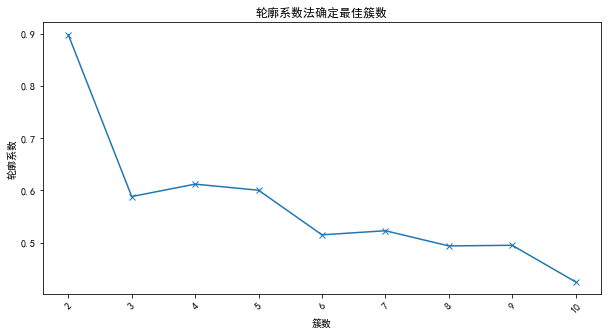

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

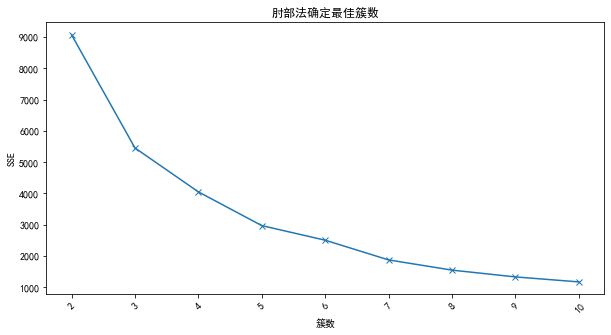

In [19]:
scaler = StandardScaler()
features = rfm[['Recency', 'InvoiceNo_Category_Count', 'Monetary']]
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=['Recency', 'InvoiceNo_Category_Count', 'Monetary'])
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=28)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='x')
plt.xlabel('簇数')
plt.xticks(rotation=45)
plt.ylabel('轮廓系数')
plt.title('轮廓系数法确定最佳簇数')
plt.show()
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=28)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# 绘制手肘图
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse, marker='x')
plt.xlabel('簇数')
plt.xticks(rotation=45)
plt.ylabel('SSE')
plt.title('肘部法确定最佳簇数')
plt.show()

In [20]:
scaled_features_df

,Recency,InvoiceNo_Category_Count,Monetary
0,-0.890099,0.206006,0.285678
1,-0.164142,-0.115240,0.001995
2,-0.728736,-0.436486,-0.029281
3,2.168157,-0.436486,-0.199422
4,-0.551975,0.634334,-0.018481
...,...,...,...
4366,1.843024,-0.436486,-0.203745
4367,0.879432,-0.436486,-0.219211
4368,-0.838734,-0.222322,-0.201123
4369,-0.878583,1.169744,-0.084148


E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


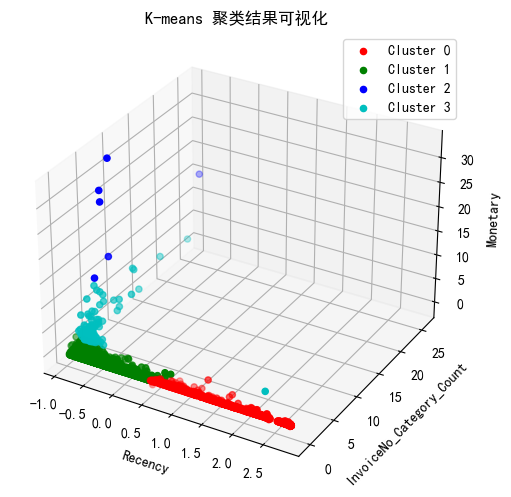

In [21]:
clusters = 4
kmeans = KMeans(n_clusters = clusters , random_state=28)
kmeans.fit(scaled_features_df)
labels = kmeans.labels_
scaled_features_df['Cluster_Label'] = labels
# 绘制 3D 可视化图
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple']
for i in range(clusters):
    cluster = scaled_features_df[scaled_features_df['Cluster_Label'] == i]
    ax.scatter(cluster['Recency'], cluster['InvoiceNo_Category_Count'], cluster['Monetary'], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Recency')
ax.set_ylabel('InvoiceNo_Category_Count')
ax.set_zlabel('Monetary')
ax.set_title('K-means 聚类结果可视化')
ax.legend()

plt.show()

In [23]:
scaled_features_df.describe().round(3)

,Recency,InvoiceNo_Category_Count,Monetary,Cluster_Label
count,4371.000,4371.000,4371.000,4371.000
mean,0.000,-0.000,0.000,0.802
std,1.000,1.000,1.000,0.557
min,-0.909,-0.436,-0.933,0.000
25%,-0.748,-0.436,-0.194,1.000
50%,-0.414,-0.222,-0.150,1.000
75%,0.506,-0.008,-0.043,1.000
max,2.796,26.013,32.910,3.000


In [24]:
scaled_features_df.to_excel('./scaled_features_df_data.xlsx', index=False)

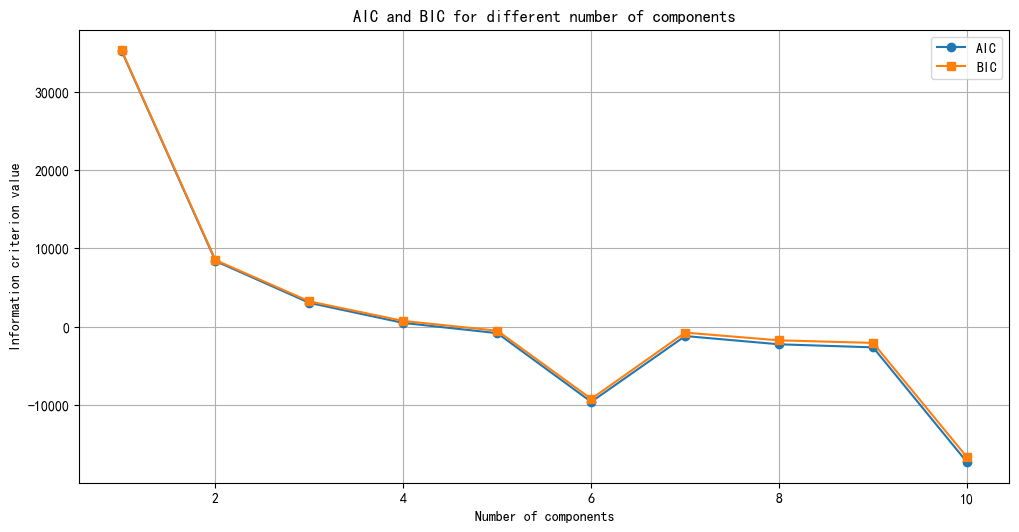

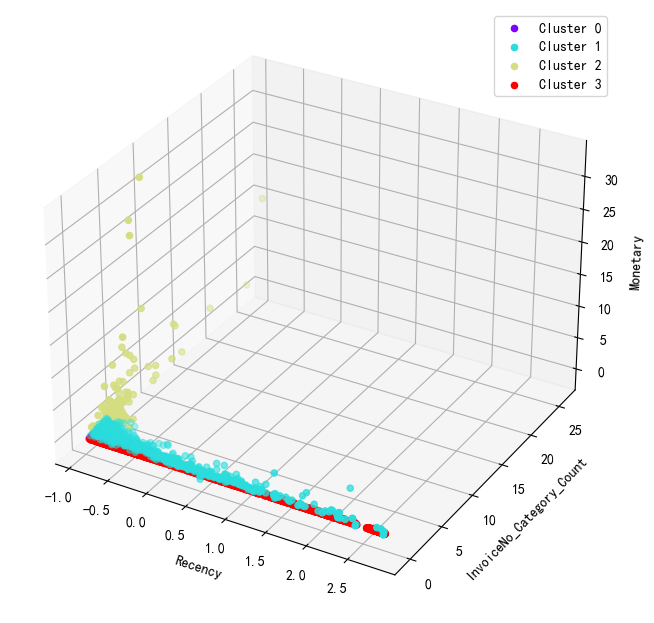

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

# 读取数据
df = pd.read_excel('./scaled_features_df_data.xlsx')

# 选取特征
X = df[['Recency', 'InvoiceNo_Category_Count', 'Monetary']]

# 定义要尝试的簇数范围
n_components_range = range(1, 11)
aic_values = []
bic_values = []

# 迭代不同的簇数
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    aic = gmm.aic(X)
    bic = gmm.bic(X)
    aic_values.append(aic)
    bic_values.append(bic)

# 绘制 AIC 和 BIC 曲线
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, aic_values, 'o-', label='AIC')
plt.plot(n_components_range, bic_values, 's-', label='BIC')
plt.xlabel('Number of components')
plt.ylabel('Information criterion value')
plt.title('AIC and BIC for different number of components')
plt.legend()
plt.grid(True)
plt.show()

# 选择最优簇数（这里根据 BIC 选择）
# optimal_n_components = np.argmin(bic_values) + 1
optimal_n_components = 4
# 使用最优簇数进行聚类
gmm_optimal = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm_optimal.fit(X)
df['GMM_Cluster_Label'] = gmm_optimal.predict(X)

# 创建 3D 图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，不同类别用不同颜色表示
colors = plt.cm.rainbow(np.linspace(0, 1, optimal_n_components))
for i in range(optimal_n_components):
    subset = df[df['GMM_Cluster_Label'] == i]
    ax.scatter(subset['Recency'], subset['InvoiceNo_Category_Count'], subset['Monetary'], c=[colors[i]], label=f'Cluster {i}')

# 设置轴标签
ax.set_xlabel('Recency')
ax.set_ylabel('InvoiceNo_Category_Count')
ax.set_zlabel('Monetary')

# 添加图例
ax.legend()

# 显示图形
plt.show()

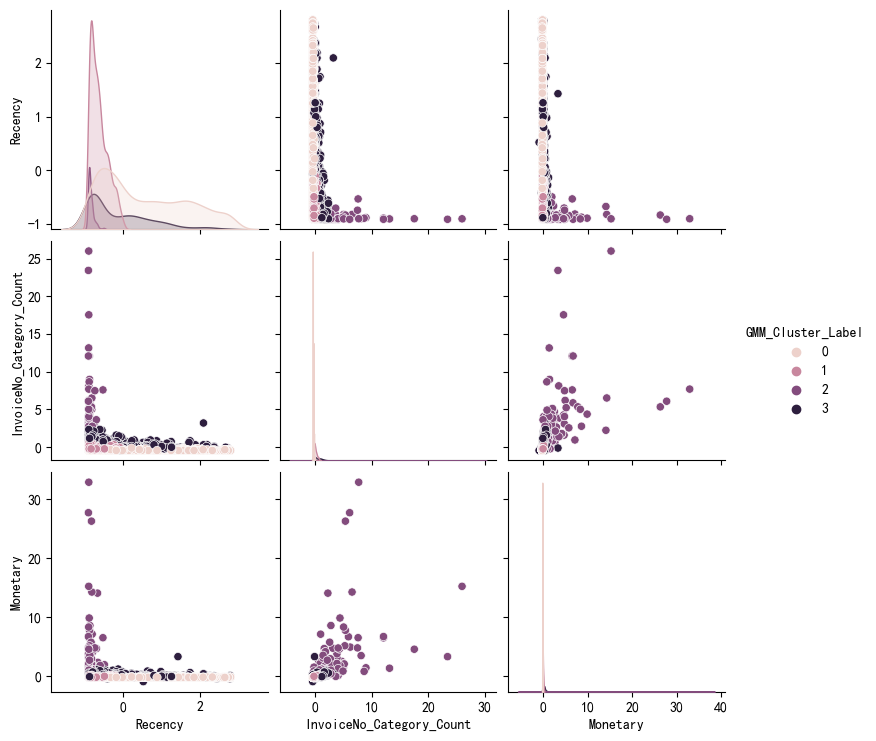

In [28]:
import seaborn as sns
X = df[['Recency', 'InvoiceNo_Category_Count', 'Monetary']]
gmm = GaussianMixture(n_components=4, random_state=28)
gmm.fit(X)
df['GMM_Cluster_Label'] = gmm.predict(X)

# 绘制散点矩阵图
g = sns.pairplot(df, hue='GMM_Cluster_Label', vars=['Recency', 'InvoiceNo_Category_Count', 'Monetary'])

# 显示图形
plt.show()